In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [ ]:
df.head(10)
# Previa da base de dados

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025.0,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025.0,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025.0,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025.0,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025.0,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M
5,2025.0,EN,FT,Data Engineer,80000,USD,80000,US,0,US,M
6,2025.0,SE,FT,Data Scientist,185000,USD,185000,US,0,US,M
7,2025.0,SE,FT,Data Scientist,148000,USD,148000,US,0,US,M
8,2025.0,MI,FT,Data Scientist,135000,USD,135000,CA,0,CA,M
9,2025.0,MI,FT,Data Scientist,108000,USD,108000,CA,0,CA,M


In [ ]:
df.info()
# Tipos de dados encontrados em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133349 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   work_year           133339 non-null  float64
 1   experience_level    133349 non-null  object 
 2   employment_type     133349 non-null  object 
 3   job_title           133349 non-null  object 
 4   salary              133349 non-null  int64  
 5   salary_currency     133349 non-null  object 
 6   salary_in_usd       133349 non-null  int64  
 7   employee_residence  133349 non-null  object 
 8   remote_ratio        133349 non-null  int64  
 9   company_location    133349 non-null  object 
 10  company_size        133349 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.2+ MB


In [ ]:
df.describe()
# count  -> Total de registros (quantidade de valores não nulos)
# mean   -> Média
# std    -> Desvio padrão
# min    -> Valor mínimo
# 25%    -> 1º quartil (25% dos dados estão abaixo desse valor)
# 50%    -> Mediana (2º quartil)
# 75%    -> 3º quartil (75% dos dados estão abaixo desse valor)
# max    -> Valor máximo

,work_year,salary,salary_in_usd,remote_ratio
count,133339.000000,1.333490e+05,133349.000000,133349.000000
mean,2024.358770,1.632833e+05,157617.272098,20.905669
std,0.680627,2.173860e+05,74288.363097,40.590044
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060200e+05,106000.000000,0.000000
50%,2024.000000,1.470000e+05,146206.000000,0.000000
75%,2025.000000,1.990000e+05,198000.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [ ]:
df.shape
# Atributo que trás uma tupla com as Linhas e Colunas

(133349, 11)

In [ ]:
linhas, colunas = df.shape[0], df.shape[1]
print(f"Linhas: {linhas}")
print(f"Colunas: {colunas}")

Linhas: 133349
Colunas: 11


In [ ]:
df.columns
# Atributo que trás uma tuplas com os nomes das colunas.

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [ ]:
# Dicionário de renomeação
novos_nomes = {
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}

# Aplicando renomeação
df.rename(columns=novos_nomes, inplace=True)

# Verificando resultado
df.columns

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [ ]:
df["senioridade"].value_counts()
# Metodo para trazer a quantidade de cada valor na coluna

,count
senioridade,
SE,77241
MI,40465
EN,12443
EX,3200


In [ ]:
df["contrato"].value_counts()

,count
contrato,
FT,132563
CT,394
PT,376
FL,16


In [ ]:
df["remoto"].value_counts()

,count
remoto,
0,105312
100,27718
50,319


In [ ]:
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
M,129561
L,3574
S,214


In [ ]:
df["senioridade"] = df["senioridade"].replace({
    "SE": "Senior",
    "MI": "Pleno",
    "EN": "Junior",
    "EX": "Executivo"
})
df["senioridade"].value_counts()

,count
senioridade,
Senior,77241
Pleno,40465
Junior,12443
Executivo,3200


In [ ]:
df["contrato"] = df["contrato"].replace({
    "FT": "Tempo Integral",
    "CT": "Contrato",
    "PT": "Tempo Parcial",
    "FL": "Freelancer"
})
df["contrato"].value_counts()

,count
contrato,
Tempo Integral,132563
Contrato,394
Tempo Parcial,376
Freelancer,16


In [ ]:
df["tamanho_empresa"] = df["tamanho_empresa"].replace({
    "M": "Médio",
    "L": "Grande",
    "S": "Pequeno"
})
df["tamanho_empresa"].value_counts()

,count
tamanho_empresa,
Médio,129561
Grande,3574
Pequeno,214


In [ ]:
df["remoto"] = df["remoto"].replace({
    0: "Presencial",
    100: "Remoto",
    50: "Híbrido"
})
df["remoto"].value_counts()

,count
remoto,
Presencial,105312
Remoto,27718
Híbrido,319


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df.describe(include="object")

,senioridade,contrato,cargo,moeda,residencia,remoto,empresa,tamanho_empresa
count,133349,133349,133349,133349,133349,133349,133349,133349
unique,4,4,390,26,102,3,95,3
top,Senior,Tempo Integral,Data Scientist,USD,US,Presencial,US,Médio
freq,77241,132563,17314,126140,119579,105312,119641,129561


In [ ]:
df.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df.isnull()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
133344,False,False,False,False,False,False,False,False,False,False,False
133345,False,False,False,False,False,False,False,False,False,False,False
133346,False,False,False,False,False,False,False,False,False,False,False
133347,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
ano,10
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df["ano"].unique()

array([2025.,   nan, 2024., 2022., 2023., 2020., 2021.])

In [ ]:
df[df.isnull().any(axis=1)]

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
5588,NaN,Senior,Tempo Integral,Product Manager,184500,USD,184500,US,Presencial,US,Médio
59692,NaN,Pleno,Tempo Integral,Engineer,110000,USD,110000,DE,Presencial,DE,Médio
59710,NaN,Junior,Tempo Integral,Data Scientist,208800,USD,208800,US,Presencial,US,Médio
59759,NaN,Senior,Tempo Integral,Software Engineer,135000,USD,135000,US,Presencial,US,Médio
59789,NaN,Senior,Tempo Integral,Engineer,112000,USD,112000,US,Presencial,US,Médio
131000,NaN,Senior,Tempo Integral,Machine Learning Engineer,163800,USD,163800,US,Presencial,US,Médio
131006,NaN,Senior,Tempo Integral,Data Analytics Manager,204500,USD,204500,US,Presencial,US,Médio
133054,NaN,Junior,Tempo Integral,Data Scientist,40000,USD,40000,JP,Remoto,MY,Grande
133281,NaN,Pleno,Tempo Integral,Machine Learning Engineer,180000,PLN,46597,PL,Remoto,PL,Grande
133317,NaN,Pleno,Tempo Integral,Data Scientist,130000,USD,130000,US,Híbrido,US,Grande


In [ ]:
# Biblioteca para trabalhar com valores nulos
import numpy as np
# Criando novo dataframe
df_salarios = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'salario': [4000, np.nan, 5000, np.nan, 100000]
})

#Criando novas coluna no dataframe e atribuindo nela os valores da coluna 'salario' com os valores nulos preenchidos com a media/mediana e arredondados
df_salarios['salario_media'] = df_salarios['salario'].fillna(df_salarios['salario'].mean().round(2))
df_salarios['salario_mediana'] = df_salarios['salario'].fillna(df_salarios['salario'].median())

df_salarios

,nome,salario,salario_media,salario_mediana
0,Ana,4000.0,4000.00,4000.0
1,Bruno,NaN,36333.33,5000.0
2,Carlos,5000.0,5000.00,5000.0
3,Daniele,NaN,36333.33,5000.0
4,Val,100000.0,100000.00,100000.0


In [ ]:
df_temperaturas = pd.DataFrame({
    'dia' : ["segunda", "terça", "quarta", "quinta", "sexta"],
    'temperatura' : [30, np.nan, np.nan, 28, 27]
})

#Preenchendo os valores nulos com os valores anteriores
df_temperaturas["preenchido_ffill"] = df_temperaturas['temperatura'].ffill()

#Preenchendo os valores nulos com o valor posterior
df_temperaturas["preenchido_bfill"] = df_temperaturas['temperatura'].bfill()

df_temperaturas

,dia,temperatura,preenchido_ffill,preenchido_bfill
0,segunda,30.0,30.0,30.0
1,terça,NaN,30.0,28.0
2,quarta,NaN,30.0,28.0
3,quinta,28.0,28.0,28.0
4,sexta,27.0,27.0,27.0


In [ ]:
df_cidades = pd.DataFrame({
    'nome': ["Ana", "Bruno", "Carlos", "Daniele", "Val"],
    'cidade': ["São Paulo", np.nan, "Curitiba", np.nan, "Belém"]
})

#Preenchendo valores nulos com um valor fixo
df_cidades['cidades_preenchida'] = df_cidades['cidade'].fillna("Não Informada")
df_cidades

,nome,cidade,cidades_preenchida
0,Ana,São Paulo,São Paulo
1,Bruno,NaN,Não Informada
2,Carlos,Curitiba,Curitiba
3,Daniele,NaN,Não Informada
4,Val,Belém,Belém


In [ ]:
#Removendo dados nulos do dataframe
df_limpo = df.dropna()
df_limpo.isnull().sum()

,0
ano,0
senioridade,0
contrato,0
cargo,0
salario,0
moeda,0
usd,0
residencia,0
remoto,0
empresa,0


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025.0,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025.0,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025.0,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025.0,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025.0,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ano              133339 non-null  float64
 1   senioridade      133339 non-null  object 
 2   contrato         133339 non-null  object 
 3   cargo            133339 non-null  object 
 4   salario          133339 non-null  int64  
 5   moeda            133339 non-null  object 
 6   usd              133339 non-null  int64  
 7   residencia       133339 non-null  object 
 8   remoto           133339 non-null  object 
 9   empresa          133339 non-null  object 
 10  tamanho_empresa  133339 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.2+ MB


In [ ]:
#Corrijindo o tipo de variavel
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 133339 entries, 0 to 133348
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              133339 non-null  int64 
 1   senioridade      133339 non-null  object
 2   contrato         133339 non-null  object
 3   cargo            133339 non-null  object
 4   salario          133339 non-null  int64 
 5   moeda            133339 non-null  object
 6   usd              133339 non-null  int64 
 7   residencia       133339 non-null  object
 8   remoto           133339 non-null  object
 9   empresa          133339 non-null  object
 10  tamanho_empresa  133339 non-null  object
dtypes: int64(3), object(8)
memory usage: 12.2+ MB


In [ ]:
df_limpo = df_limpo.assign(salario = df_limpo['salario'].astype('float64'))
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000.0,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000.0,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800.0,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200.0,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000.0,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000.0,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000.0,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800.0,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200.0,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000.0,USD,90000,US,Presencial,US,Médio


<Axes: title={'center': 'Distribuição de senioridade'}, xlabel='senioridade'>

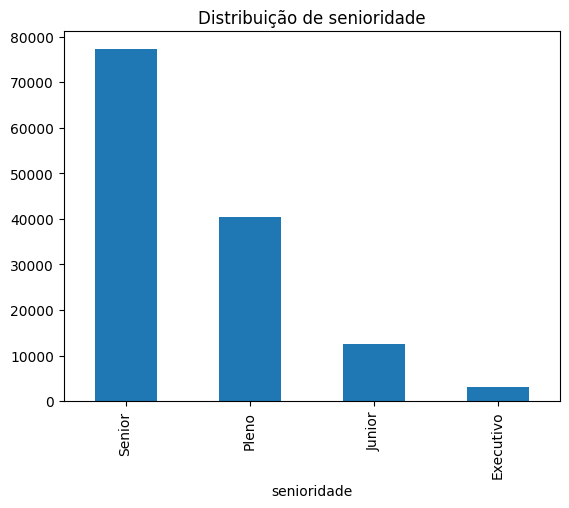

In [ ]:
df_limpo['senioridade'].value_counts().plot(kind='bar', title='Distribuição de senioridade')

In [ ]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

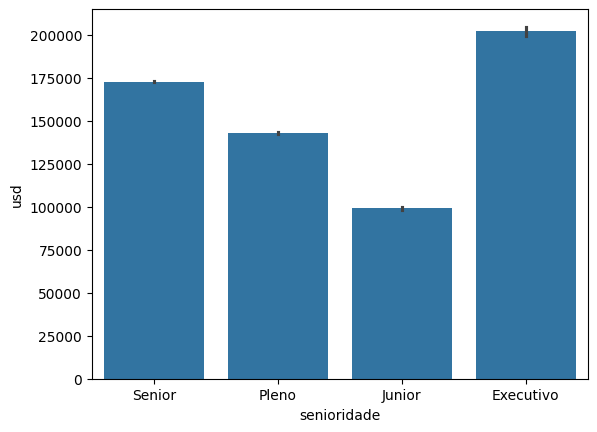

In [ ]:
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')

In [ ]:
import matplotlib.pyplot as plt

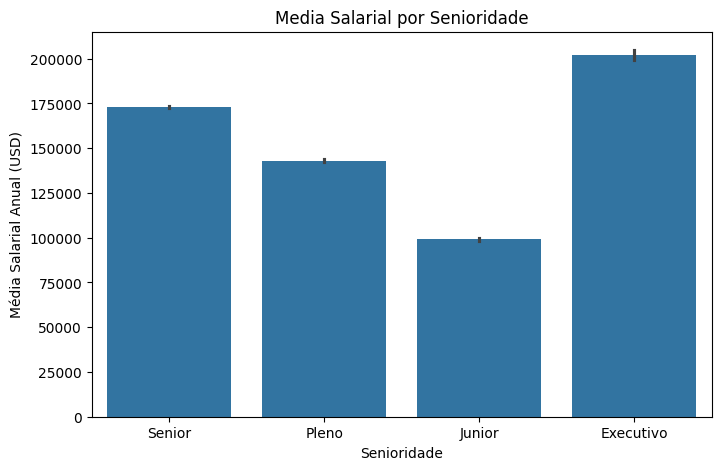

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd')
plt.title('Media Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Média Salarial Anual (USD)')
plt.show()

In [ ]:
# Agrupando e Ordenando
df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
Executivo,202027.667813
Senior,172850.838301
Pleno,143044.845979
Junior,99034.963267


In [ ]:
ordem = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=True).index
ordem

Index(['Junior', 'Pleno', 'Senior', 'Executivo'], dtype='object', name='senioridade')

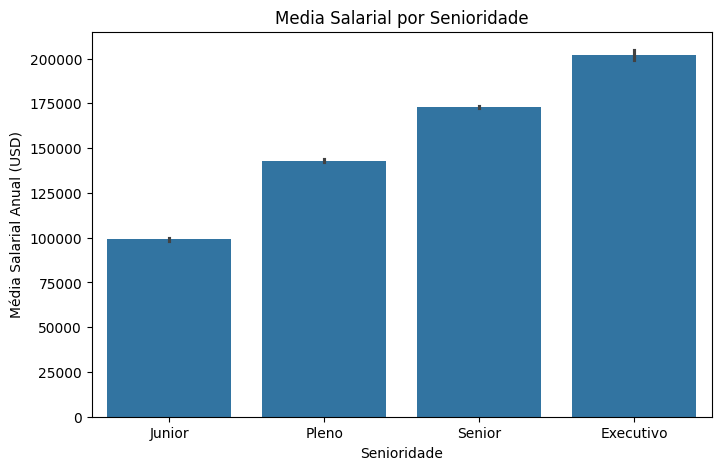

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data = df_limpo, x = 'senioridade', y = 'usd', order = ordem)
plt.title('Media Salarial por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Média Salarial Anual (USD)')
plt.show()

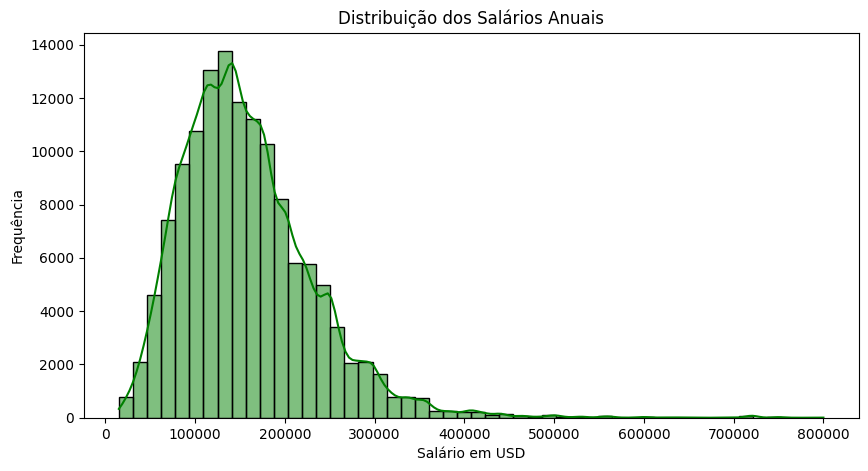

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(data = df_limpo['usd'], bins=50, kde = True, color = 'green')
plt.title('Distribuição dos Salários Anuais')
plt.xlabel('Salário em USD')
plt.ylabel('Frequência')
plt.show()

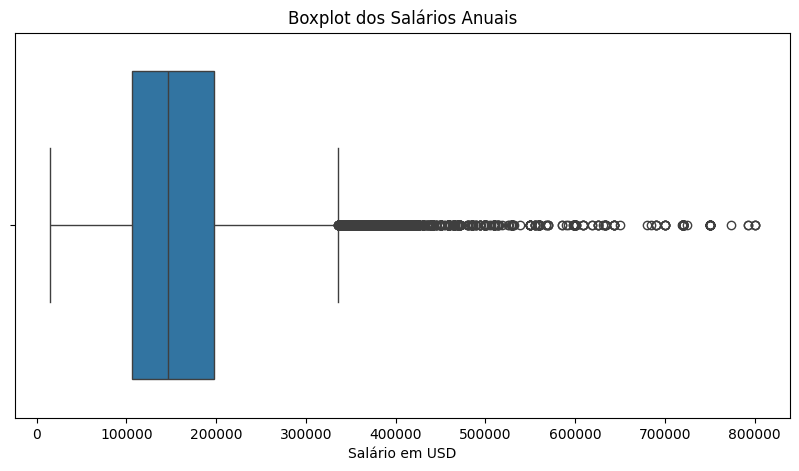

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = df_limpo['usd'])
plt.title('Boxplot dos Salários Anuais')
plt.xlabel('Salário em USD')
plt.show()

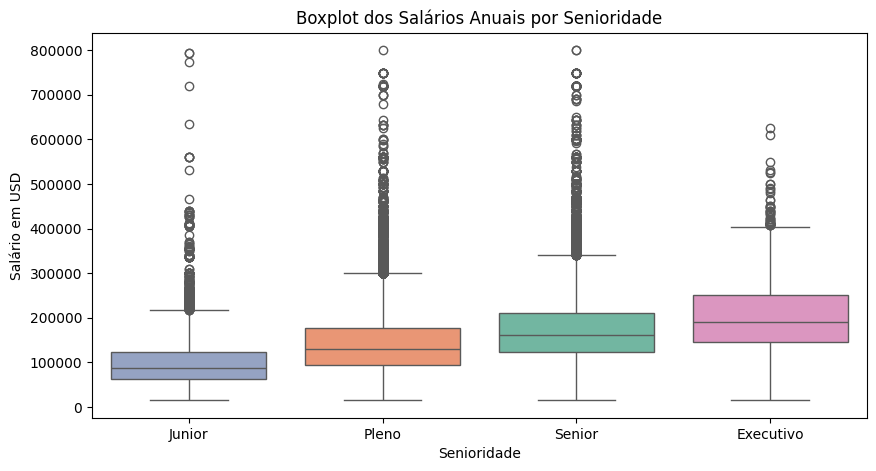

In [ ]:
from matplotlib import color_sequences
ordem_senioridade = ['Junior', 'Pleno', 'Senior', 'Executivo']
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'senioridade', y = 'usd', data = df_limpo, order = ordem_senioridade, palette= 'Set2', hue='senioridade')
plt.title('Boxplot dos Salários Anuais por Senioridade')
plt.xlabel('Senioridade')
plt.ylabel('Salário em USD')
plt.show()


In [ ]:
import plotly.express as px

In [ ]:
df_media_senioridade = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending = False).reset_index()

fig = px.bar(
    df_media_senioridade,
    x='senioridade',
    y='usd',
    title='Média Salarial por Senioridade (Plotly)',
    labels={'senioridade': 'Senioridade', 'usd': 'Média Salarial Anual (USD)'},
    # category_orders={'senioridade': ordem_senioridade} # Usando a ordem definida anteriormente
)

fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['remoto', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='remoto',
    values='quantidade',
    title = 'Proporção dos Tipos de Contrato'
    )
fig.show()

In [ ]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['remoto', 'quantidade']

fig = px.pie(
    remoto_contagem,
    names='remoto',
    values='quantidade',
    title = 'Proporção dos Tipos de Contrato',
    hole = 0.5
    )
fig.update_traces(textinfo = 'percent+label')
fig.show()

# Desafio: Pegar o cargo de cientista de dados e gerar gráfico de salario médio por país usando potly

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,Senior,Tempo Integral,Solutions Engineer,214000.0,USD,214000,US,Remoto,US,Médio
1,2025,Senior,Tempo Integral,Solutions Engineer,136000.0,USD,136000,US,Remoto,US,Médio
2,2025,Pleno,Tempo Integral,Data Engineer,158800.0,USD,158800,AU,Presencial,AU,Médio
3,2025,Pleno,Tempo Integral,Data Engineer,139200.0,USD,139200,AU,Presencial,AU,Médio
4,2025,Junior,Tempo Integral,Data Engineer,90000.0,USD,90000,US,Presencial,US,Médio


In [ ]:
df_limpo['cargo'].unique()

array(['Solutions Engineer', 'Data Engineer', 'Data Scientist',
       'BI Developer', 'Data Analyst', 'Applied Scientist',
       'Systems Engineer', 'Director', 'Associate', 'Software Engineer',
       'Consultant', 'Analyst', 'Product Manager', 'Software Developer',
       'Engineer', 'Developer', 'Data Specialist', 'Manager',
       'Research Scientist', 'Software Architect',
       'Data Management Analyst', 'Data Reporter',
       'Computational Biologist', 'Product Designer',
       'Software Development Engineer', 'Architect',
       'Data Analytics Manager', 'Principal Statistical Programmer',
       'Cloud Engineer', 'Data Architect', 'Product Owner', 'Executive',
       'Business Intelligence Engineer', 'Data Governance Lead',
       'Data Governance Specialist', 'AI Engineer', 'Solutions Architect',
       'AI Researcher', 'Machine Learning Engineer', 'Bear Robotics',
       'Data Strategist', 'Research Engineer', 'Researcher',
       'Business Analyst', 'Solution Engineer'

In [ ]:
pip install pycountry

In [ ]:
import pycountry

def iso2_to_iso3(code):
  try:
    return pycountry.countries.get(alpha_2=code).alpha_3
  except:
    return None

df_limpo['residencia_iso3'] = df_limpo['residencia'].apply(iso2_to_iso3)

In [ ]:
df_data_science = df_limpo[df_limpo['cargo'].str.contains('Data Scientist', case=False)]
df_data_science_media_salario = df_data_science.groupby('residencia_iso3')['usd'].mean().sort_values(ascending=False).reset_index()
fig = px.bar(
    df_data_science_media_salario,
    x='residencia_iso3',
    y='usd',
    labels={'residencia_iso3': 'País', 'usd': 'Média Salarial(USD)'},
    title='Média Salarial de Cientista de Dados por País'
)
fig.show()

In [ ]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa,residencia_iso3
0,2025,Senior,Tempo Integral,Solutions Engineer,214000.0,USD,214000,US,Remoto,US,Médio,USA
1,2025,Senior,Tempo Integral,Solutions Engineer,136000.0,USD,136000,US,Remoto,US,Médio,USA
2,2025,Pleno,Tempo Integral,Data Engineer,158800.0,USD,158800,AU,Presencial,AU,Médio,AUS
3,2025,Pleno,Tempo Integral,Data Engineer,139200.0,USD,139200,AU,Presencial,AU,Médio,AUS
4,2025,Junior,Tempo Integral,Data Engineer,90000.0,USD,90000,US,Presencial,US,Médio,USA


In [ ]:
df_limpo.to_csv('Dados_Salarios.csv', index=False)

Senha: AlURA